In [1]:
from maelzel.core import *
cfg = getConfig()
cfg['show.backend'] = 'musicxml'
logger.setLevel('DEBUG')


[maelzel.core:mobj.py:1714 -        _renderObject() ] rendering parts with backend: musicxml


Chain([4C:1♩:gliss=True:symbols=[Hairpin(direction=>, kind=start, uuid=yw6ogovw)], 4A+, Rest:1♩])
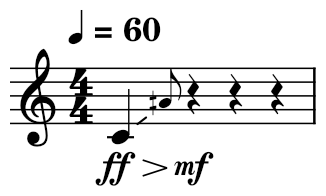

In [2]:
n = Note(60, dynamic='ff', gliss=True)
m = Note("4A+!", dur=0)
o = Rest(1, dynamic='mf')
ch = Chain([n, m, o])
ch.addSpanner('>')
ch

[maelzel.core:mobj.py:1714 -        _renderObject() ] rendering parts with backend: musicxml


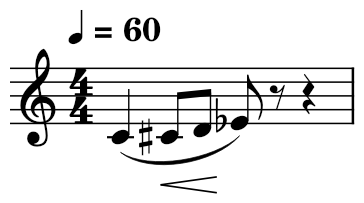

In [3]:
ch = Chain([
    Note(60, 1).addSpanner('slur'),
    Note(61, 0.5).addSpanner('<'), 
    Note(62, 0.5),
    Note(63, 0.5).addSpanner('~<').addSpanner('~slur')
])
ch.dump()
ch.show()


[maelzel.core:mobj.py:1714 -        _renderObject() ] rendering parts with backend: lilypond


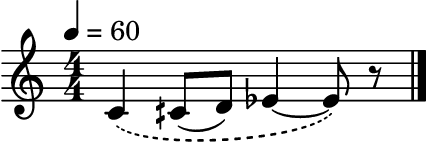

[maelzel.core:mobj.py:1714 -        _renderObject() ] rendering parts with backend: musicxml


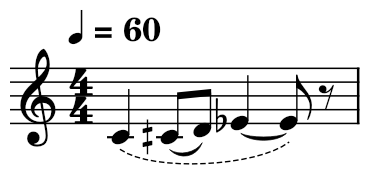

Part #0:
  Measure #0
    Timesig: 4/4 (quarter=60)
    Node ratio: 1/1, offset=0, end=4
      Node ratio: 1/1, offset=0, end=1
        «0.000:1.000 1/1♩ 4C spanners=[Slur(kind=start, uuid=ku7k5xpn, linetype=dashed,
          nestingLevel=2)]»
      Node ratio: 1/1, offset=1, end=2
        «1.000:1.500 1/2♩ 4C+ spanners=[Slur(kind=start, uuid=m7y2a9oe, linetype=solid)]»
        «1.500:2.000 1/2♩ 4D spanners=[Slur(kind=end, uuid=m7y2a9oe, linetype=solid)]»
      Node ratio: 1/1, offset=2, end=3
        «2.000:3.000 1/1♩ 4Eb tiedNext»
      Node ratio: 1/1, offset=3, end=4
        «3.000:3.500 1/2♩ 4Eb tiedPrev spanners=[Slur(kind=end, uuid=ku7k5xpn, linetype=dashed,
          nestingLevel=2)]»
        «3.500:4.000 1/2♩ rest»


In [4]:
# Multiple slurs
ch = Chain([
    Note(60, 1),
    Note(60.5, 0.5), 
    Note(62, 0.5),
    Note(63, 1.5)
])
ch[0].addSpanner(symbols.Slur(linetype='dashed'), ch[3])
ch[1].addSpanner('slur', ch[2])
ch.show(backend='lilypond')
ch.show(backend='musicxml')
ch.write('~/tmp/slurs.ly')
q = ch.quantizedScore()
q.dump()

## Hairpins

[maelzel.core:mobj.py:1714 -        _renderObject() ] rendering parts with backend: musicxml


Part #0:
  Measure #0
    Timesig: 4/4 (quarter=60)
    Node ratio: 1/1, offset=0, end=4
      Node ratio: 1/1, offset=0, end=1
        «0.000:1.000 1/1♩ 4C p spanners=[Hairpin(direction=<, kind=start, uuid=6sr1gik4)]»
      Node ratio: 1/1, offset=1, end=3
        «1.000:1.500 1/2♩ 4D»
        «1.500:2.000 1/2♩ 4E tiedNext f spanners=[Hairpin(direction=<, kind=end, uuid=6sr1gik4)]»
        «2.000:2.500 1/2♩ 4E tiedPrev»
        «2.500:3.000 1/2♩ 4F tiedNext»
      Node ratio: 1/1, offset=3, end=4
        «3.000:4.000 1/1♩ 4F tiedPrev»


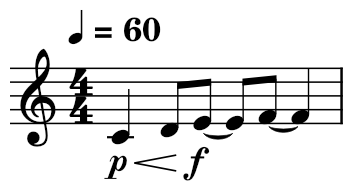

In [3]:
from maelzel.core import *
cfg = getConfig()
cfg['show.backend'] = 'musicxml'
logger.setLevel('DEBUG')

chain = Chain([
    Note("4C", 1, dynamic='p').addSpanner("<"),
    Note("4D", 0.5),
    Note("4E", dynamic='f'),   # This ends the hairpin spanner
    Note("4F", 1.5)   # This ends the hairpin spanner
    
])
chain.dump()
chain.quantizedScore().dump()
chain.show()
#chain.show(backend='musicxml')
#chain.write('~/tmp/hairpin.musicxml')


In [4]:
def f():
    for _  in range(10000):
        chain._changed()
        chain._update()
%prun f()

         120004 function calls in 0.083 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.043    0.000    0.055    0.000 chain.py:37(_stackEvents)
    10000    0.011    0.000    0.066    0.000 chain.py:594(_update)
        1    0.008    0.008    0.082    0.082 722105254.py:1(f)
    40000    0.008    0.000    0.008    0.000 mobj.py:218(dur)
    10000    0.006    0.000    0.008    0.000 chain.py:603(_changed)
    40000    0.005    0.000    0.005    0.000 {built-in method builtins.isinstance}
    10000    0.002    0.000    0.002    0.000 mobj.py:229(parent)
        1    0.000    0.000    0.083    0.083 {built-in method builtins.exec}
        1    0.000    0.000    0.083    0.083 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

[maelzel.core:mobj.py:1714 -        _renderObject() ] rendering parts with backend: lilypond


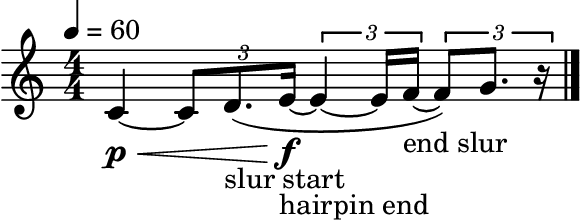

[maelzel.core:mobj.py:1714 -        _renderObject() ] rendering parts with backend: musicxml


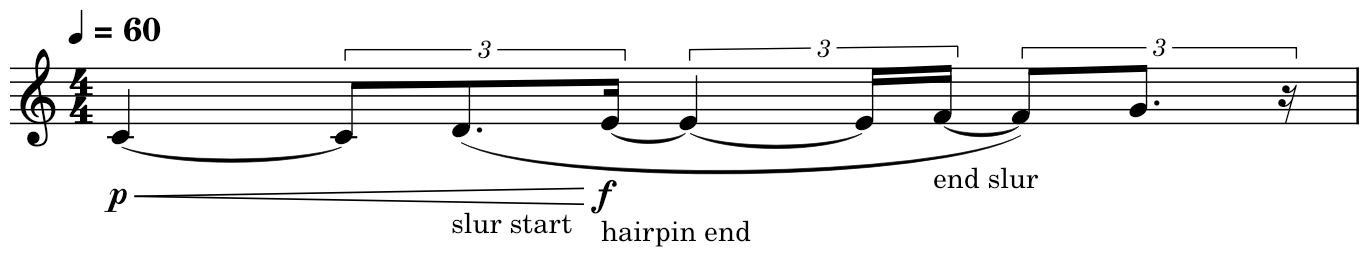

Measure #0
  Timesig: 4/4 (quarter=60)
  Node ratio: 1/1, offset=0, end=4
    Node ratio: 1/1, offset=0, end=1
      «0.000:1.000 1/1♩ 4C tiedNext p spanners=[Hairpin(direction=<, kind=start,
        uuid=af5vibfe)]»
    Node ratio: 3/2, offset=1, end=2
      «1.000:1.333 1/3♩ 3/2 4C tiedPrev»
      «1.333:1.833 1/2♩ 3/2 4D attachments=[Text(text=slur start, placement=, fontsize=10.0)]
        spanners=[Slur(kind=start, uuid=dmvds506, linetype=solid)]»
      «1.833:2.000 1/6♩ 3/2 4E tiedNext f attachments=[Text(text=hairpin end, placement=,
        fontsize=10.0)] spanners=[Hairpin(direction=<, kind=end, uuid=af5vibfe)]»
    Node ratio: 3/2, offset=2, end=3
      «2.000:2.667 2/3♩ 3/2 4E tiedPrev tiedNext»
      «2.667:2.833 1/6♩ 3/2 4E tiedPrev»
      «2.833:3.000 1/6♩ 3/2 4F tiedNext attachments=[Text(text=end slur, placement=,
        fontsize=10.0)]»
    Node ratio: 3/2, offset=3, end=4
      «3.000:3.333 1/3♩ 3/2 4F tiedPrev spanners=[Slur(kind=end, uuid=dmvds506,
        linetype

In [5]:
chain = Chain([
    Note("4C", 1+F(1, 3), dynamic='p').addSpanner("<"),
    Note("4D", 0.5, label='slur start').addSpanner("slur"),
    Note("4E", dynamic='f', label='hairpin end'),   
    Note("4F", 0.5, label='end slur').addSpanner('~slur'),  # This ends the slur
    Note("4G", 0.5),
])
chain.show(backend='lilypond')
chain.show(backend='musicxml')
q = chain.quantizedScore().parts[0].dump()

